# Tutorial diffractio: determinación del foco de una lente
Se muestra cómo calcular mediante diffractio de la distribución de intensidad alrededor de uan lente

In [1]:
from diffractio import plt, np, sp, um, mm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY, Scalar_field_XY, Scalar_source_XY
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

number of processors: 4
total memory        : 6.0 Gb
available memory    : 42 %
max frequency       : 2794 GHz


In [2]:
from diffractio import degrees, eps, mm, no_date, np, plt, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=[6,6]
rcParams['figure.dpi']=125

## Cargar_parametros

In [4]:
length = 2*mm
focal=125*mm
lens_radius=1*mm
df = 50*mm
numdata_xy = 256
numdata_z = 64

In [5]:
x0 = np.linspace(-length / 2, length / 2, numdata_xy)
y0 = np.linspace(-length / 2, length / 2, numdata_xy)
z0 = np.linspace(focal-df/2, focal+df/2, numdata_z)
wavelength = 0.6328 * um

In [6]:
# Fuente de iluminación
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(2*mm,2*mm))

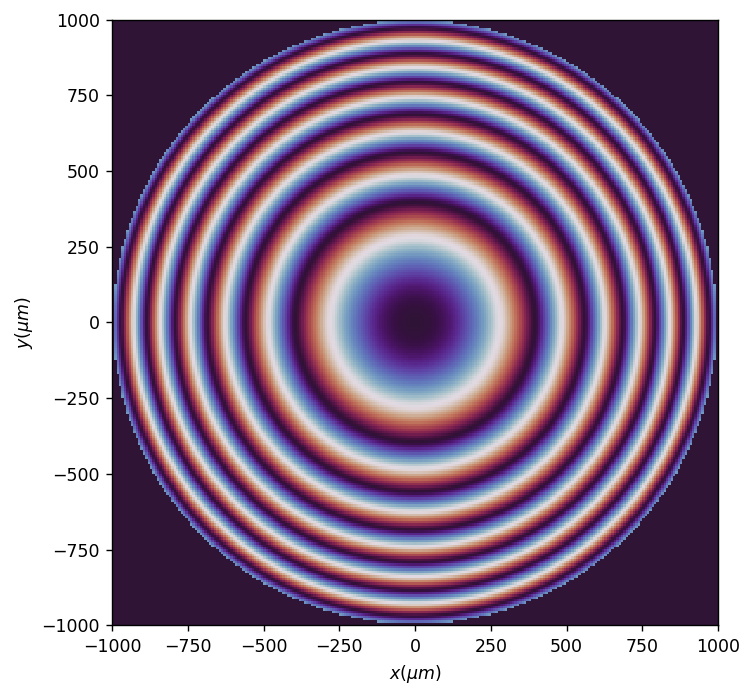

In [7]:
# Mascara
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.lens(r0=(0,0), radius=lens_radius, focal=focal, angle=0.0, mask=True)
t1.draw('phase');

## Propagación

In [8]:
t3 = u1 * t1
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS(verbose=True)

time in RS= 15.43198013305664. num proc= 2


15.43198013305664

(-150.0, 150.0)

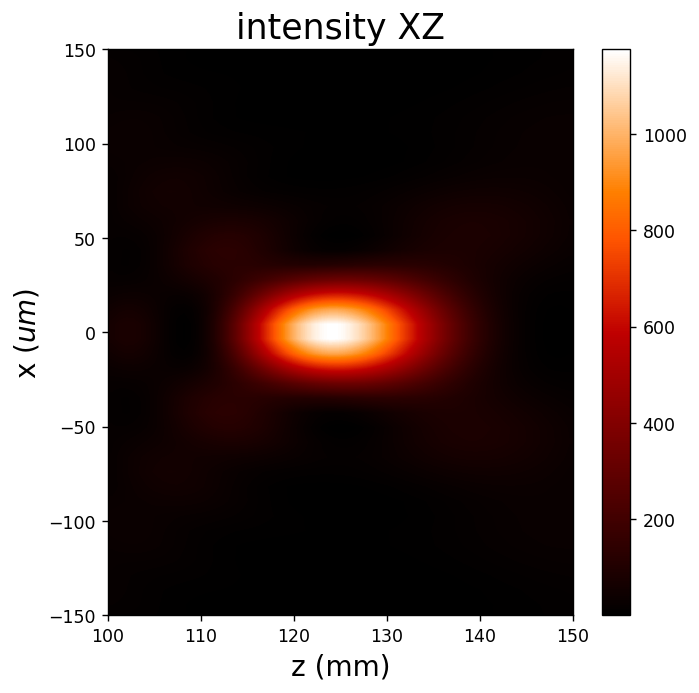

In [9]:
uxyz.draw_XZ(y0=0)
plt.ylim(-150, 150)

240.90757084147336 240.90757084147336


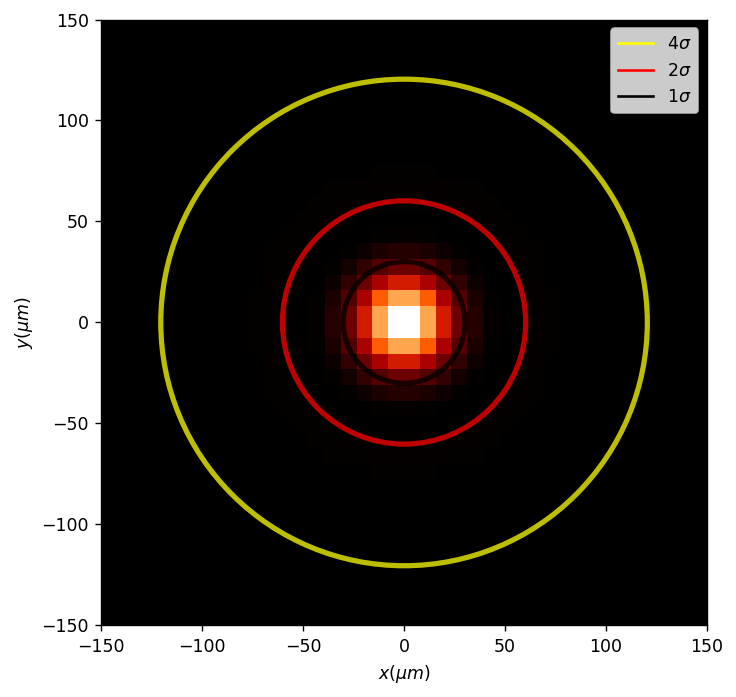

In [10]:
u_xy=uxyz.to_Scalar_field_XY(z0=focal)
dx,dy,_,_=u_xy.beam_width_4s(has_draw=True); plt.xlim(-150,150); plt.ylim(-150,150)
print(dx,dy)

(-200.0, 200.0)

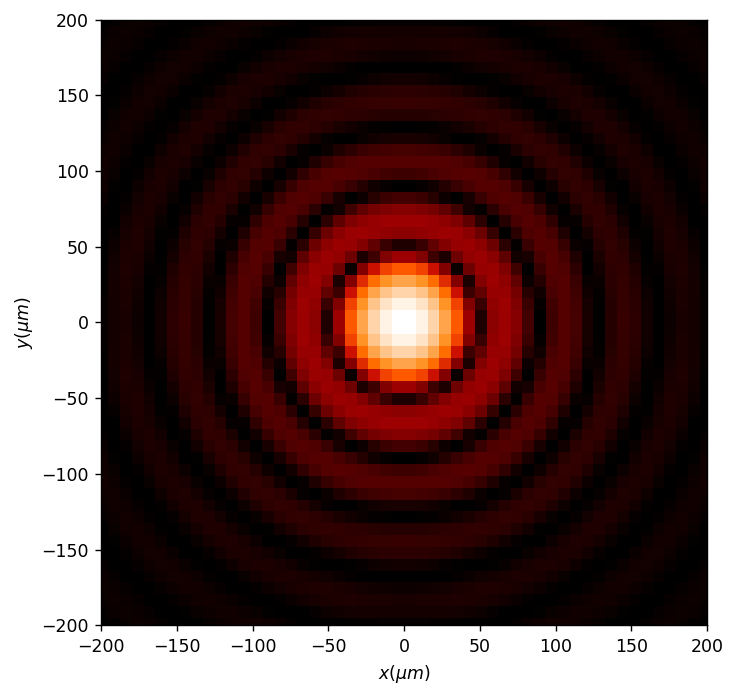

In [11]:
uxyz.draw_XY(z0=focal, logarithm=True,)
plt.xlim(-200,200)
plt.ylim(-200,200)

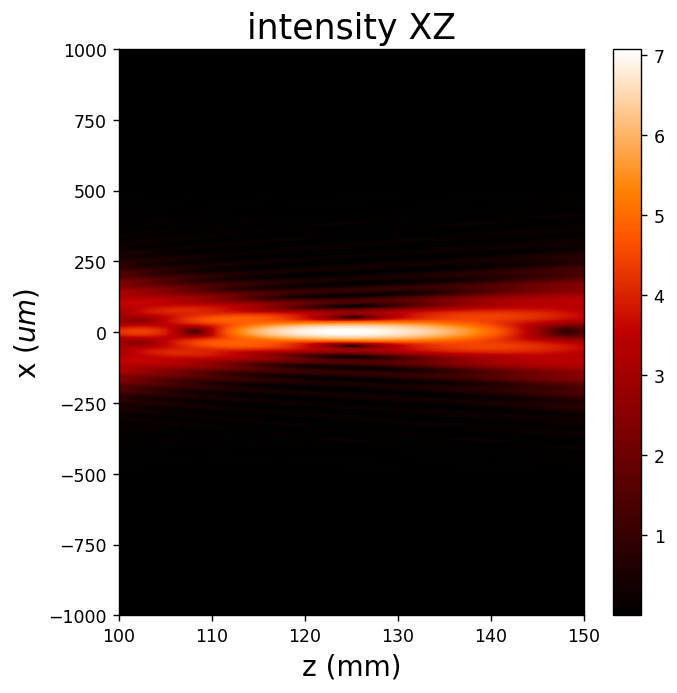

In [12]:
uxyz.draw_XZ(y0=0.0 * mm, logarithm=True,)

In [13]:
u_xz=uxyz.to_Scalar_field_XZ(y0=0)

(-150.0, 150.0)

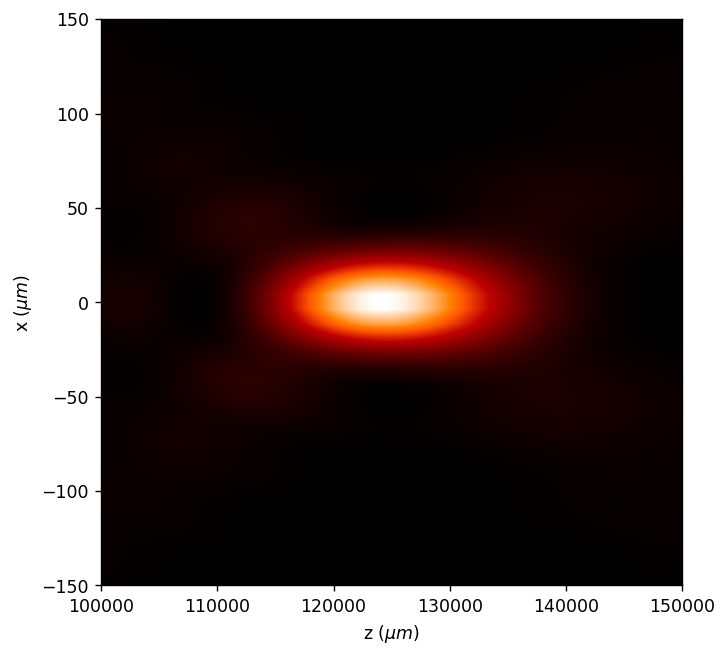

In [14]:
u_xz.draw()
plt.ylim(-150,150)

In [15]:
u_xz.search_focus()

x = 3.922 um, z = 123809.524 um


(3.921568627450938, 123809.52380952382)

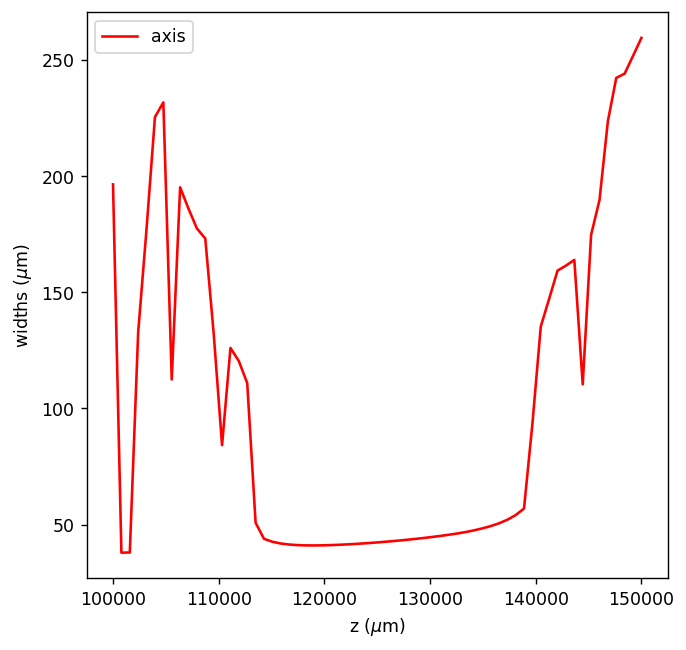

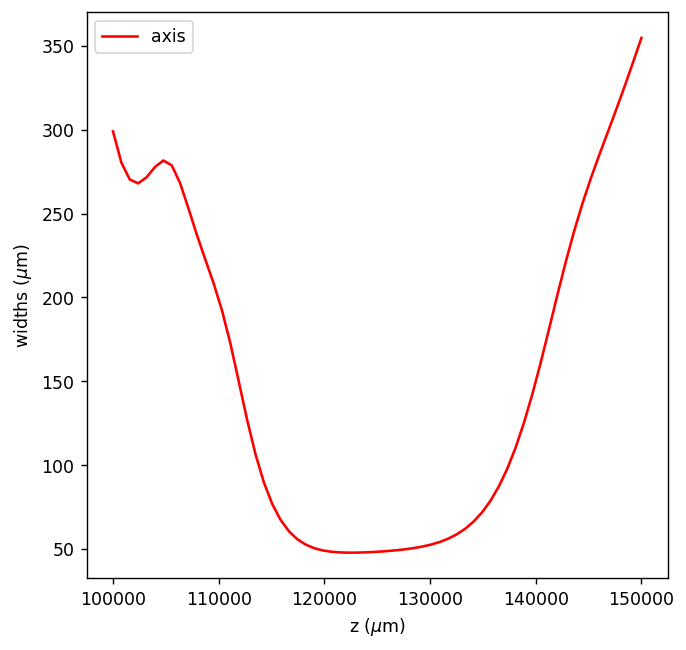

In [23]:
anchuras_FWHM,_=u_xz.beam_widths(kind='FWHM1D')
anchuras_sigma,_=u_xz.beam_widths(kind='sigma4')

(-300.0, 300.0)

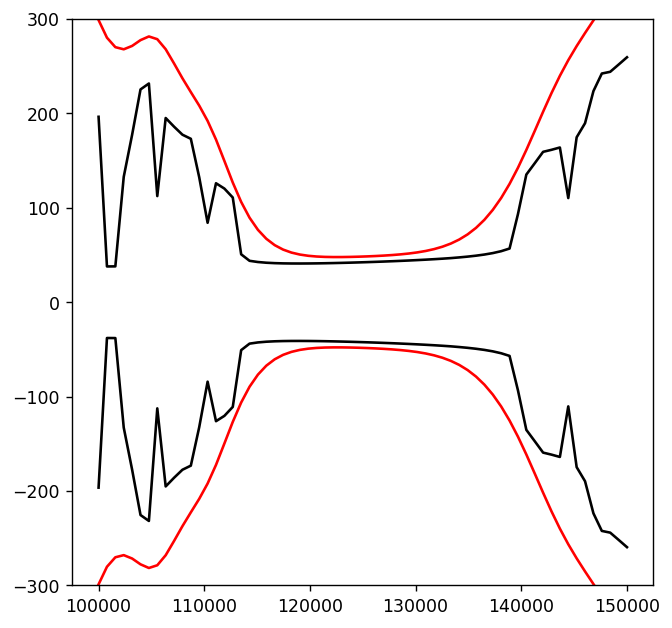

In [26]:
plt.plot(z0,anchuras_FWHM, 'k')
plt.plot(z0,-anchuras_FWHM, 'k')
plt.plot(z0,anchuras_sigma, 'r')
plt.plot(z0,-anchuras_sigma, 'r')
plt.ylim(-300,300)

In [18]:
# uxyz.draw_XYZ(logarithm=False, normalize='maximum')